In [46]:
import pandas as pd

#read in cleaned datasets
df_cow = pd.read_csv('cleaned_COW.csv')

df_worldbank = pd.read_csv('cleaned_worldbank.csv')

df_worldbank_europe = pd.read_csv('10a4608f-ff56-459f-914e-384c746b70f6_Data.csv')

#clean worldbank europe dataset
df_worldbank_europe = df_worldbank_europe.melt(
    id_vars = ['Country Name', 'Country Code', 'Series Name', 'Series Code'],
    var_name='Year',
    value_name='Value'
)

df_worldbank_europe['Value'] = df_worldbank_europe['Value'].fillna(0)

#convert Year column to numeric and clean syntax
df_worldbank_europe['Year'] = df_worldbank_europe['Year'].str.extract(r'(\d{4})').astype(int)

#convert Value column to numeric
df_worldbank_europe['Value'] = pd.to_numeric(df_worldbank_europe['Value'], errors='coerce')



#convert date column to date time
df_cow.dropna(subset=['announcement_date'], inplace=True)

df_cow['announcement_date'] = pd.to_datetime(df_cow['announcement_date'])

df_cow['Year'] = df_cow['announcement_date'].dt.year.astype(int)

#shorten year range
df_worldbank = df_worldbank[(df_worldbank['Year'] >= 2020) & (df_worldbank['Year'] <= 2023)]

df_worldbank_europe = df_worldbank_europe[(df_worldbank_europe['Year'] >= 2020) & (df_worldbank_europe['Year'] <= 2023)]

#pivot columns for better formatting
df_worldbank = df_worldbank.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

df_worldbank_europe = df_worldbank_europe.pivot_table(
    index=['Country Name', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

#create one name for countries
df_cow['Country Name'] = df_cow['donor']

#merge data sets
df_merged_1 = pd.merge(df_cow, df_worldbank, on=['Country Name', 'Year'], how='inner')

df_merged_final = pd.merge(df_worldbank_europe, df_merged_1, on=['Country Name', 'Year'], how='inner')

df_merged_final.to_csv('df_merged_final.csv')

df_merged_final.head()


,Country Name,Year,Armed forces personnel (% of total labor force),"Armed forces personnel, total_x",Military expenditure (% of GDP)_x,Military expenditure (% of general government expenditure),Military expenditure (current USD)_x,donor,announcement_date,aid_type_general,...,tot_activity_value_EUR.1,tot_sub_activity_value,tot_sub_activity_value_EUR,item_value_estimate_USD.1,item_value_estimate_deliv_USD,"Armed forces personnel, total_y",Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),Military expenditure (% of GDP)_y,Military expenditure (current USD)_y
0,Estonia,2022,NaN,NaN,2.160443,5.453144,8.182790e+08,Estonia,2022-02-18,Military,...,3438577.0,3900000.0,3438577.0,3900000.0,3900000.0,NaN,9000000.0,18000000.0,2.160443,8.182790e+08
1,Estonia,2022,NaN,NaN,2.160443,5.453144,8.182790e+08,Estonia,2022-02-09,Military,...,0.0,0.0,0.0,6040473.0,6040473.0,NaN,9000000.0,18000000.0,2.160443,8.182790e+08
2,Estonia,2022,NaN,NaN,2.160443,5.453144,8.182790e+08,Estonia,2022-04-06,Military,...,5000000.0,5000000.0,5000000.0,NaN,NaN,NaN,9000000.0,18000000.0,2.160443,8.182790e+08
3,Estonia,2022,NaN,NaN,2.160443,5.453144,8.182790e+08,Estonia,2022-08-18,Military,...,0.0,0.0,0.0,6040473.0,6040473.0,NaN,9000000.0,18000000.0,2.160443,8.182790e+08
4,Estonia,2022,NaN,NaN,2.160443,5.453144,8.182790e+08,Estonia,2022-08-18,Military,...,47112658.0,47112658.0,47112658.0,NaN,NaN,NaN,9000000.0,18000000.0,2.160443,8.182790e+08


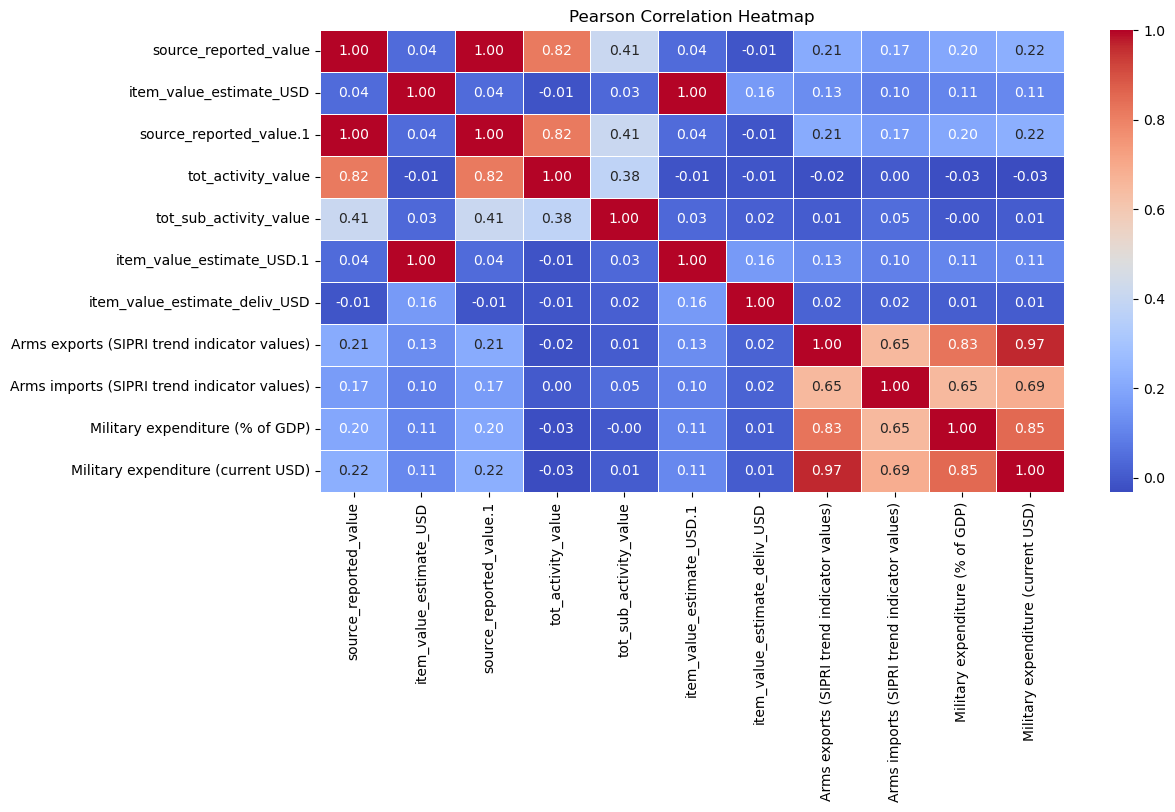

In [54]:
#Correlation Matrix
import matplotlib.pyplot as plt
import seaborn as sns


#select only numeric columns
df_merged_numeric = df_merged_1.select_dtypes(include='number')

#drop unnescary columns 
df_merged_numeric = df_merged_numeric.drop(columns=['Year', 'Armed forces personnel, total', 'tot_activity_value_EUR.1', 'tot_sub_activity_value_EUR', 'tot_activity_value_EUR'], errors='ignore')

#fill NULL values with 0
df_merged_numeric = df_merged_numeric.fillna(0)

#compute correlation matrix
corr_matrix = df_merged_numeric.corr(method='pearson')

df_merged_numeric.head()

#plot
plt.figure(figsize=(12,6))
sns.heatmap(
    corr_matrix, 
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Pearson Correlation Heatmap')
plt.show()


